=== Survival Rates by Class and Group ===
    class    who  survived
0   First  child  0.833333
1   First    man  0.352941
2   First  woman  0.978022
3  Second  child  1.000000
4  Second    man  0.080808
5  Second  woman  0.909091
6   Third  child  0.431034
7   Third    man  0.119122
8   Third  woman  0.491228


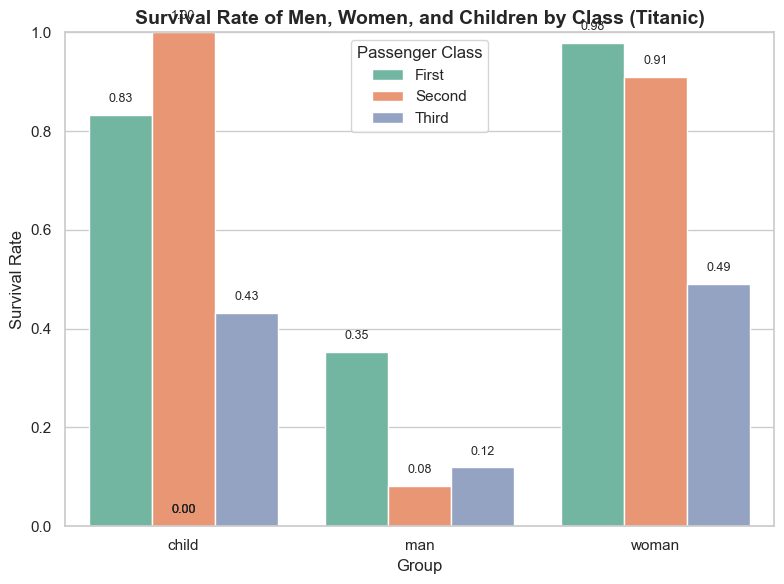

In [2]:
# ============================================================
# Titanic Survival Rate Analysis by Class and Demographic Group
# Author: Phạm Thanh Long - B22DCCN505
# Description:
#     This program analyzes Titanic dataset to compute the 
#     survival rates grouped by passenger class and demographic 
#     category (man, woman, child). Results are visualized using 
#     a bar chart for comparison.
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------------------------------------
# Step 1: Load dataset
# ------------------------------------------------------------
# Dataset must contain at least: 
#     - 'class': Passenger class (First, Second, Third)
#     - 'who'  : Demographic group (man, woman, child)
#     - 'survived': Binary (0 = no, 1 = yes)
# ------------------------------------------------------------
titanic = pd.read_csv("titanic.csv")

# ------------------------------------------------------------
# Step 2: Compute survival rates
# ------------------------------------------------------------
# Group by passenger class and demographic category
survival_rates = (
    titanic.groupby(['class', 'who'], observed=True)['survived']
    .mean()
    .reset_index()
)

print("=== Survival Rates by Class and Group ===")
print(survival_rates)

# ------------------------------------------------------------
# Step 3: Visualization with barplot
# ------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    x="who",
    y="survived",
    hue="class",
    data=survival_rates,
    palette="Set2"
)

# ------------------------------------------------------------
# Step 4: Customize chart
# ------------------------------------------------------------
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Group", fontsize=12)
plt.title("Survival Rate of Men, Women, and Children by Class (Titanic)", 
          fontsize=14, weight="bold")
plt.ylim(0, 1)
plt.legend(title="Passenger Class")

# Add value annotations on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 0.02,
        f"{height:.2f}",
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.savefig("titanic_survival_rates.png", dpi=300)
plt.show()
